In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.utils import load_forecaster

In [2]:
currency_df = pd.read_excel("exchange_hisroty_cbr.xlsx")

In [214]:
print(set(currency_df["Букв. код"].to_list()))

{'NOK', 'LVL', 'AUD', 'JPY', 'LTL', 'UAH', 'EGP', 'ESP', 'BYR', 'AZN', 'GEL', 'SGD', 'PLN', 'IEP', 'EEK', 'ITL', 'PTE', 'USD', 'EUR', 'TRY', 'BRL', 'ISK', 'RSD', 'TRL', 'IDR', 'CZK', 'KZT', 'BEF', 'ZAR', 'KRW', 'NLG', 'XEU', 'BYB', 'MDL', 'TJS', 'GRD', 'SEK', 'BGN', 'AMD', 'CNY', 'VND', 'KGS', 'NZD', 'BYN', 'GBP', 'QAR', 'ATS', 'CAD', 'HKD', 'INR', 'RON', 'FRF', 'AED', 'DEM', 'CHF', 'HUF', 'THB', 'FIM', 'UZS', 'XDR', 'TMT', 'DKK'}


In [215]:
data = currency_df[currency_df["Букв. код"] == "BRL"].reset_index()

In [216]:
data = data[["Курс", "Дата"]]
data = data.rename(columns={"Курс": "rate", "Дата": "date"})
data["date"] = pd.to_datetime(data["date"], format="%d.%m.%Y")
data = data.set_index("date").asfreq("D").sort_index()

In [217]:
data

,rate
date,
2010-01-12,17.0451
2010-01-13,16.9127
2010-01-14,16.9774
2010-01-15,16.7406
2010-01-16,16.8100
...,...
2024-07-12,16.3049
2024-07-13,16.2195
2024-07-14,16.2195


In [218]:
complete_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq=data.index.freq)
is_index_complete = (data.index == complete_date_range).all()

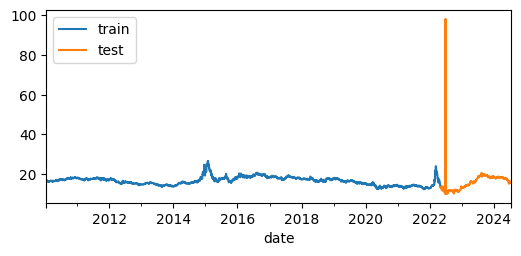

In [219]:
steps = 4500
data_train = data[:steps]
data_test  = data[steps:]

fig, ax = plt.subplots(figsize=(6, 2.5))
data_train["rate"].plot(ax=ax, label="train")
data_test["rate"].plot(ax=ax, label="test")
ax.legend();

In [220]:
forecaster = ForecasterAutoreg(
                 regressor = GradientBoostingRegressor(
                    loss = 'squared_error', 
                    learning_rate = 0.19, 
                    n_estimators = 100, 
                    subsample = 1, 
                    criterion = 'squared_error', 
                    min_samples_split = 2, 
                    min_samples_leaf = 1, 
                    min_weight_fraction_leaf = 0, 
                    max_depth = 3, 
                    min_impurity_decrease = 0.000001, 
                    random_state = 42, 
                    max_features = 0.5, 
                    verbose = 0, 
                    max_leaf_nodes = None, 
                    warm_start = True, 
                    n_iter_no_change = None,  
                    ccp_alpha = 0
                     
                 ),
                 lags = 500
             )
forecaster.fit(y=data_train["rate"])
forecaster

ForecasterAutoreg 
Regressor: GradientBoostingRegressor(ccp_alpha=0, criterion='squared_error',
                          learning_rate=0.19, max_features=0.5,
                          min_impurity_decrease=1e-06,
                          min_weight_fraction_leaf=0, random_state=42,
                          subsample=1, warm_start=True) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 16

In [228]:
predictions = forecaster.predict(steps=len(data) - steps)

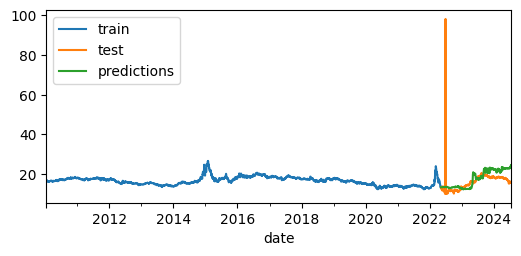

In [229]:
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train["rate"].plot(ax=ax, label="train")
data_test["rate"].plot(ax=ax, label="test")
predictions.plot(ax=ax, label="predictions")
ax.legend();

In [230]:
print(mean_squared_error(data_test["rate"],predictions))

19.533083581318934


In [231]:
joblib.dump(forecaster, "BRL_fluctuation_forecaster.sav")

['BRL_fluctuation_forecaster.sav']